# 日経平均株価 先物 15分足

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = "NIY=F"
#code = "NIYH26.CME"
symbol = "%s" % code
ticker1 = yf.Ticker(symbol)
df = ticker1.history(period="2d", interval="15m")
df.index = df.index.tz_convert("Asia/Tokyo")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2026-02-05 14:00:00+09:00,53785.0,53840.0,53785.0,53805.0,35,0.0,0.0
2026-02-05 14:15:00+09:00,53795.0,53865.0,53745.0,53865.0,210,0.0,0.0
2026-02-05 14:30:00+09:00,53845.0,53900.0,53815.0,53860.0,103,0.0,0.0
2026-02-05 14:45:00+09:00,53870.0,53890.0,53815.0,53840.0,94,0.0,0.0
2026-02-05 15:00:00+09:00,53825.0,53970.0,53825.0,53955.0,163,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-07 05:45:00+09:00,56350.0,56465.0,56320.0,56430.0,1174,0.0,0.0
2026-02-07 06:00:00+09:00,56445.0,56525.0,56380.0,56460.0,316,0.0,0.0
2026-02-07 06:15:00+09:00,56450.0,56450.0,56410.0,56435.0,62,0.0,0.0


In [4]:
dt1 = df.head(1).index[0]
dt2 = dt1 + datetime.timedelta(days=1)
dt_start = pd.to_datetime(
    f"{dt2.year:04d}-{dt2.month:02d}-{dt2.day:02d} 15:30:00+09:00"
)
df = df[df.index >= dt_start]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2026-02-06 15:30:00+09:00,54300.0,54410.0,54260.0,54400.0,843,0.0,0.0
2026-02-06 15:45:00+09:00,54400.0,54420.0,54320.0,54380.0,419,0.0,0.0
2026-02-06 16:00:00+09:00,54370.0,54370.0,54105.0,54150.0,1092,0.0,0.0
2026-02-06 16:15:00+09:00,54160.0,54340.0,54160.0,54325.0,174,0.0,0.0
2026-02-06 16:30:00+09:00,54320.0,54320.0,54180.0,54200.0,902,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-07 05:45:00+09:00,56350.0,56465.0,56320.0,56430.0,1174,0.0,0.0
2026-02-07 06:00:00+09:00,56445.0,56525.0,56380.0,56460.0,316,0.0,0.0
2026-02-07 06:15:00+09:00,56450.0,56450.0,56410.0,56435.0,62,0.0,0.0


In [5]:
dt = df.tail(1).index[0]
year_str = f"{dt.year:04d}"
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'0207'

## ローソク足チャート（小さいサイズ）

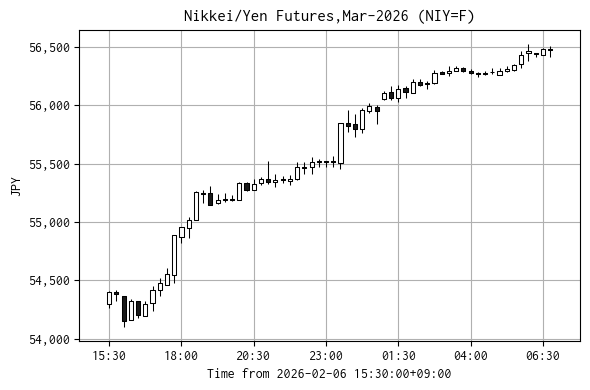

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10

fig, ax = plt.subplots(figsize=(6, 4))
mpf.plot(
    df,
    type="candle",
    style="default",
    datetime_format="%H:%M",
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel(f"Time from {dt_start}")
ax.set_ylabel("JPY")
ax.grid()

if "shortName" in ticker1.info:
    ax.set_title(f"{ticker1.info['shortName']} ({symbol})")
elif "longName" in ticker1.info:
    ax.set_title(f"{ticker1.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")

plt.tight_layout()
plt.savefig(os.path.join(f"{year_str}", f"{date_str}_report_15min_chart_{code}.png"))
plt.show()